# Bobobox Test by Marselius Agus Dhion

## Data Understanding

In [246]:
import pandas as pd
pd.options.display.max_columns = None

df = pd.read_csv('D:\Bobobox\Data Reporting - Data Set - nps_feedbacks 20230612-12325.tsv', delimiter='\t')
df_en = pd.read_csv('D:\Bobobox\Data Reporting - Data Set - EN - nps_feedbacks 20230612-12325_en.tsv', delimiter='\t')
df_id = pd.read_csv('D:\Bobobox\Data Reporting - Data Set - ID - nps_feedbacks 20230612-12325_id.tsv', delimiter='\t')
df.head()

,nps_score,checkin_date,checkout_date,created_at,source,order_id,hotel_name,pod_type,nps_review
0,9,2023-06-11 0:00:00,2023-06-12 0:00:00,2023-06-12 1:04:16,iOS,1.011169e+16,Bobobox Tanah Abang,Earth Single,Ok banget
1,9,2023-06-10 23:00:00,2023-06-11 23:00:00,2023-06-12 1:03:35,iOS,1.023169e+16,Bobocabin Kintamani,Deluxe Cabin,"tempatnya bagus, tenang, nyaman."
2,9,2023-06-11 0:00:00,2023-06-12 0:00:00,2023-06-12 0:35:32,Android,1.026169e+16,Bobocabin Baturraden,DELUXE CABIN,OKOK
3,10,2023-05-31 0:00:00,2023-06-01 0:00:00,2023-06-11 17:54:34,iOS,1.004169e+16,Bobobox Pancoran,Earth Double,Please improve staff to be more active and dil...
4,10,2023-06-09 0:00:00,2023-06-10 0:00:00,2023-06-11 16:02:58,iOS,1.014169e+16,Bobobox Slamet Riyadi Solo,Sky Double,nice


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nps_score      1000 non-null   int64  
 1   checkin_date   1000 non-null   object 
 2   checkout_date  1000 non-null   object 
 3   created_at     1000 non-null   object 
 4   source         1000 non-null   object 
 5   order_id       1000 non-null   float64
 6   hotel_name     1000 non-null   object 
 7   pod_type       1000 non-null   object 
 8   nps_review     1000 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 70.4+ KB


### Cek kualitas data

1. Terdapat 1000 baris dengan 9 kolom
2. Tidak terdapat data yang null value

In [247]:
df.shape

(1000, 9)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nps_score      1000 non-null   int64  
 1   checkin_date   1000 non-null   object 
 2   checkout_date  1000 non-null   object 
 3   created_at     1000 non-null   object 
 4   source         1000 non-null   object 
 5   order_id       1000 non-null   float64
 6   hotel_name     1000 non-null   object 
 7   pod_type       1000 non-null   object 
 8   nps_review     1000 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 70.4+ KB


In [249]:
df.isnull().sum()

nps_score        0
checkin_date     0
checkout_date    0
created_at       0
source           0
order_id         0
hotel_name       0
pod_type         0
nps_review       0
dtype: int64

In [250]:
df.nunique()

nps_score         11
checkin_date      65
checkout_date     63
created_at       999
source             2
order_id         972
hotel_name        27
pod_type          23
nps_review       866
dtype: int64

### Exploratory Data Analysis (EDA)
1. Dari kolom pod_type terdapat kolom-kolom yang sama, namun formatnya yang berbeda. 

   => Ex : 'Sky Double' dengan 'SKY DOUBLE' --> Nanti akan disesuaikan formatnya pada bagian Data Preparation
2. Perbandingan jumlah NPS Score pada range 0-4 lebih sedikit dibandingkan jumlah NPS Score pada range 7-10

   => Hipotesa Awal : Review Positif lebih banyak dibandingkan Review Negatif. Walaupun belum didapatkan perbandingan review positif dan negatif pada pod_type yang berjenis Bobobox dan Bobocabin

   => Dari NPS Score tersebut akan dibuat kolom baru bernama 'score_classification' berisikan seperti keterangan dibawah ini.
   
   => Ket : Range 0-4 : Review Negatif || Range 7-10 : Review Positif || Range 5-6 : Review Netral
    
3. Pada kolom hotel_name terdapat value yang bernilai 'Boboliving' yaitu 'Boboliving Pancoran'.
   
   => Dikarenakan kita akan membandingkan antara bobocabin dengan bobobox saja. Maka nanti akan didrop untuk baris yang bernilai 'Boboliving' tersebut pada bagian Data Preparation 

4. Pada kolom nps_review terdapt value yang berbahasa Indonesia dan ada juga yang berbahasa Inggris. 
   
   => Oleh karena itu, nanti pada bagian Data Preparation akan dilakukan translate dari bahasa Inggris ke Indonesia. 
   
   => Dengan menggunakan bahasa yang sama, tujuannya supaya mempermudah bahwa reviewnya ini termasuk review yang positif atau negatif

5. User yang menggunakan Android lebih banyak dibandingkan iOS

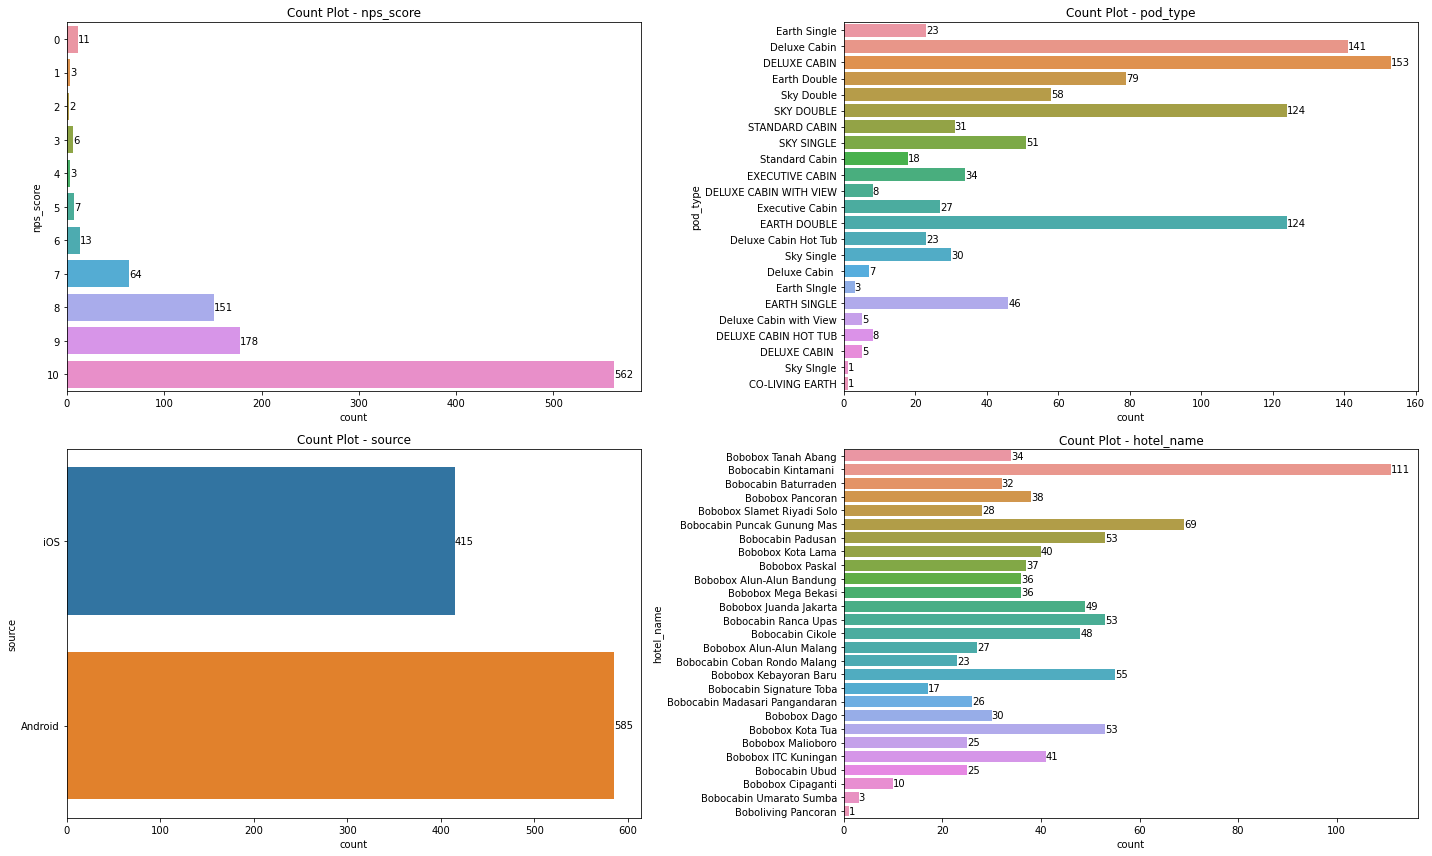

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur ukuran figure
plt.figure(figsize=(20, 12))

# Subplot pertama untuk kolom 'nps_score'
plt.subplot(2, 2, 1)
sns.countplot(y='nps_score', data=df)
plt.title('Count Plot - nps_score')

# Menambahkan anotasi teks di atas setiap bar untuk kolom 'nps_score'
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

# Subplot kedua untuk kolom 'pod_type'
plt.subplot(2, 2, 2)
sns.countplot(y='pod_type', data=df)
plt.title('Count Plot - pod_type')

# Menambahkan anotasi teks di atas setiap bar untuk kolom 'pod_type'
ax2 = plt.gca()
for p in ax2.patches:
    ax2.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

# Subplot ketiga untuk kolom 'source'
plt.subplot(2, 2, 3)
sns.countplot(y='source', data=df)
plt.title('Count Plot - source')

# Menambahkan anotasi teks di atas setiap bar untuk kolom 'order_id'
ax3 = plt.gca()
for p in ax3.patches:
    ax3.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

# Subplot keempat untuk kolom 'hotel_name'
plt.subplot(2, 2, 4)
sns.countplot(y='hotel_name', data=df)
plt.title('Count Plot - hotel_name')

# Menambahkan anotasi teks di atas setiap bar untuk kolom 'hotel_name'
ax4 = plt.gca()
for p in ax4.patches:
    ax4.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

# Menampilkan plot
plt.tight_layout()
plt.show()

## Data Preparation

### Data Preparation for Both df_id & df_en

In [252]:
# Menyamakan format pada value kolom 'pod_type' 
df_id['pod_type'] = df_id['pod_type'].str.title()
df_en['pod_type'] = df_id['pod_type'].str.title()

In [253]:
# Fungsi untuk mengklasifikasikan nilai
def classify_score(score):
    if score >= 7:
        return 'Positif'
    elif score >= 5:
        return 'Netral'
    else:
        return 'Negatif'

# Buat kolom baru 'score_classification'
df_id['score_classification'] = df_id['nps_score'].apply(classify_score)
df_en['score_classification'] = df_en['nps_score'].apply(classify_score)

In [254]:
# Drop value 'Boboliving Pancoran'
df_id = df_id[df_id['hotel_name'] != 'Boboliving Pancoran']
df_en = df_en[df_en['hotel_name'] != 'Boboliving Pancoran']

# Buat kolom baru 'hotel_type'
df_id['hotel_type'] = df_id['hotel_name'].apply(lambda x: 'Bobobox' if 'Bobobox' in x else 'Bobocabin')
df_en['hotel_type'] = df_en['hotel_name'].apply(lambda x: 'Bobobox' if 'Bobobox' in x else 'Bobocabin')

In [255]:
df_en.head()
# df_id.head()

,nps_score,checkin_date,checkout_date,created_at,source,order_id,hotel_name,pod_type,nps_review,nps_review_en,score_classification,hotel_type
0,9,2023-06-11 0:00:00,2023-06-12 0:00:00,2023-06-12 1:04:16,iOS,1.011169e+16,Bobobox Tanah Abang,Earth Single,Ok banget,Ok,Positif,Bobobox
1,9,2023-06-10 23:00:00,2023-06-11 23:00:00,2023-06-12 1:03:35,iOS,1.023169e+16,Bobocabin Kintamani,Deluxe Cabin,"tempatnya bagus, tenang, nyaman.","The place is good, calm, comfortable.",Positif,Bobocabin
2,9,2023-06-11 0:00:00,2023-06-12 0:00:00,2023-06-12 0:35:32,Android,1.026169e+16,Bobocabin Baturraden,Deluxe Cabin,OKOK,REASONS,Positif,Bobocabin
3,10,2023-05-31 0:00:00,2023-06-01 0:00:00,2023-06-11 17:54:34,iOS,1.004169e+16,Bobobox Pancoran,Earth Double,Please improve staff to be more active and dil...,Please improve staff to be more active and dil...,Positif,Bobobox
4,10,2023-06-09 0:00:00,2023-06-10 0:00:00,2023-06-11 16:02:58,iOS,1.014169e+16,Bobobox Slamet Riyadi Solo,Sky Double,nice,nice,Positif,Bobobox


### Stemming dan Stopword pada kolom nps_review

#### Untuk df_id

In [256]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

def preprocess_text_id(text):
    # Case Folding (Lowercasing)
    text = text.lower()
    
    # Menghapus karakter yang tidak penting
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = re.sub(r'\W+', ' ', text)  # Menghapus karakter non-alphanumerik kecuali spasi
        
    # Stemming
    stemmer = StemmerFactory().create_stemmer()
    words = [stemmer.stem(word) for word in text.split()]
    
    # Gabungkan kembali kata-kata menjadi teks
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [257]:
reviews_id = df_id['nps_review_id'].tolist()
preprocessed_texts_id = [preprocess_text_en(review) for review in reviews_id]
df_id['preprocessed_review_id'] = preprocessed_texts_id

for i in range(5):
    print(f"Before: {reviews_id[i]} | After: {preprocessed_texts_id[i]}")

Before: Oke | After: oke
Before: tempatnya bagus, tenang, nyaman. | After: tempatnya bagu tenang nyaman
Before: Alasan | After: alasan
Before: Harap tingkatkan staf untuk menjadi lebih aktif dan rajin | After: harap tingkatkan staf untuk menjadi lebih aktif dan rajin
Before: Bagus | After: bagu


#### Untuk df_en

In [258]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

def preprocess_text_en(text):
    # Case Folding (Lowercasing)
    text = text.lower()
    
    # Menghapus karakter yang tidak penting
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = re.sub(r'\W+', ' ', text)  # Menghapus karakter non-alphanumerik kecuali spasi
        
    # Tokenisasi kata
    words = text.split()
    
    # Stopwords removal
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Gabungkan kembali kata-kata menjadi teks
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text


In [259]:
reviews_en = df_en['nps_review_en'].tolist()
preprocessed_texts_en = [preprocess_text_en(review) for review in reviews_en]
df_en['preprocessed_review_en'] = preprocessed_texts_en

for i in range(5):
    print(f"Before: {reviews_en[i]} | After: {preprocessed_texts_en[i]}")

Before: Ok | After: ok
Before: The place is good, calm, comfortable. | After: place good calm comfort
Before: REASONS | After: reason
Before: Please improve staff to be more active and diligent  | After: pleas improv staff activ dilig
Before: nice | After: nice


#### Checking & Drop Null Values After Stemming & Stopwords

In [260]:
print("Review - ID")
nps_null_review = len(df_id[df_id["preprocessed_review_id"]==""])
df_id_len = len(df_id)
print(f"Total NPS Null Reviews : {nps_null_review}")
print(f"Total Data : {df_id_len}")
print(f"NPS Null Reviews : {nps_null_review/df_id_len*100} %")

print("\nReview - EN")
nps_null_review = len(df_en[df_en["preprocessed_review_en"]==""])
df_en_len = len(df_en)
print(f"Total NPS Null Reviews : {nps_null_review}")
print(f"Total Data : {df_en_len}")
print(f"NPS Null Reviews : {nps_null_review/df_en_len*100} %")

Review - ID
Total NPS Null Reviews : 10
Total Data : 999
NPS Null Reviews : 1.001001001001001 %

Review - EN
Total NPS Null Reviews : 15
Total Data : 999
NPS Null Reviews : 1.5015015015015014 %


In [261]:
df_en[df_en["preprocessed_review_en"]==""]
df_en = df_en[df_en['preprocessed_review_en'] != '']

In [262]:
df_id[df_id["preprocessed_review_id"]==""]
df_id = df_id[df_id['preprocessed_review_id'] != '']

#### Modelling Untuk df_id

In [263]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load IndoBERT model
model_name = "indolem/indobert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Preprocess and analyze sentiment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

Some weights of the model checkpoint at indolem/indobert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indober

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31923, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [278]:
reviews_model_id = df_id['preprocessed_review_id']

data_id = []

# Perform sentiment analysis and store the data_id
for review in reviews_model_id:
    inputs = tokenizer(review, truncation=True, padding=True, return_tensors="pt")
    input_ids = inputs["input_ids"].to(device)
    attention_mask = inputs["attention_mask"].to(device)

    with torch.no_grad():
        logits = model(input_ids, attention_mask=attention_mask)[0]
        probabilities = torch.softmax(logits, dim=1).squeeze()

    positive_prob = probabilities[1].item()
    negative_prob = probabilities[0].item()

    sentiment_score = positive_prob - negative_prob

    sentiment_label = ""
    if sentiment_score > 0.05:
        sentiment_label = "Positive"
    elif sentiment_score < -0.05:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    data_id.append({
        "Review": review,
        "Sentiment": sentiment_label,
        "Sentiment Score": sentiment_score
    }
    )

In [279]:
# Konversi list data_id ke dalam dataframe
df_data_id = pd.DataFrame(data_id)
df_data_id.head()

,Review,Sentiment,Sentiment Score
0,oke,Negative,-0.190381
1,tempatnya bagu tenang nyaman,Negative,-0.092344
2,alasan,Negative,-0.088745
3,harap tingkatkan staf untuk menjadi lebih akti...,Negative,-0.181704
4,bagu,Negative,-0.172892


In [280]:
df_data_id['Sentiment'].value_counts()

Negative    659
Neutral     166
Positive    164
Name: Sentiment, dtype: int64

#### Modelling untuk df_en

##### Model VADER

In [267]:
df_en.head()

,nps_score,checkin_date,checkout_date,created_at,source,order_id,hotel_name,pod_type,nps_review,nps_review_en,score_classification,hotel_type,preprocessed_review_en
0,9,2023-06-11 0:00:00,2023-06-12 0:00:00,2023-06-12 1:04:16,iOS,1.011169e+16,Bobobox Tanah Abang,Earth Single,Ok banget,Ok,Positif,Bobobox,ok
1,9,2023-06-10 23:00:00,2023-06-11 23:00:00,2023-06-12 1:03:35,iOS,1.023169e+16,Bobocabin Kintamani,Deluxe Cabin,"tempatnya bagus, tenang, nyaman.","The place is good, calm, comfortable.",Positif,Bobocabin,place good calm comfort
2,9,2023-06-11 0:00:00,2023-06-12 0:00:00,2023-06-12 0:35:32,Android,1.026169e+16,Bobocabin Baturraden,Deluxe Cabin,OKOK,REASONS,Positif,Bobocabin,reason
3,10,2023-05-31 0:00:00,2023-06-01 0:00:00,2023-06-11 17:54:34,iOS,1.004169e+16,Bobobox Pancoran,Earth Double,Please improve staff to be more active and dil...,Please improve staff to be more active and dil...,Positif,Bobobox,pleas improv staff activ dilig
4,10,2023-06-09 0:00:00,2023-06-10 0:00:00,2023-06-11 16:02:58,iOS,1.014169e+16,Bobobox Slamet Riyadi Solo,Sky Double,nice,nice,Positif,Bobobox,nice


In [328]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Data
data = df_en['preprocessed_review_en'].tolist()

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis and create DataFrame
sentiments = []
compound_scores = []

for sentence in data:
    sentiment_scores = sia.polarity_scores(sentence)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        sentiment = 'Positive'
    elif compound_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    sentiments.append(sentiment)
    compound_scores.append(compound_score)


df_en['Sentiment'] = sentiments
df_en['Compound Score'] = compound_scores
# df_eng_sentiment = pd.DataFrame({'Sentence': data, 'Sentiment': sentiments, 'Compound Score': compound_scores})

# Print the DataFrame
df_en.head()

,nps_score,checkin_date,checkout_date,created_at,source,order_id,hotel_name,pod_type,nps_review,nps_review_en,score_classification,hotel_type,preprocessed_review_en,Sentiment,Compound Score
0,9,2023-06-11 0:00:00,2023-06-12 0:00:00,2023-06-12 1:04:16,iOS,1.011169e+16,Bobobox Tanah Abang,Earth Single,Ok banget,Ok,Positif,Bobobox,ok,Positive,0.2960
1,9,2023-06-10 23:00:00,2023-06-11 23:00:00,2023-06-12 1:03:35,iOS,1.023169e+16,Bobocabin Kintamani,Deluxe Cabin,"tempatnya bagus, tenang, nyaman.","The place is good, calm, comfortable.",Positif,Bobocabin,place good calm comfort,Positive,0.7717
2,9,2023-06-11 0:00:00,2023-06-12 0:00:00,2023-06-12 0:35:32,Android,1.026169e+16,Bobocabin Baturraden,Deluxe Cabin,OKOK,REASONS,Positif,Bobocabin,reason,Neutral,0.0000
3,10,2023-05-31 0:00:00,2023-06-01 0:00:00,2023-06-11 17:54:34,iOS,1.004169e+16,Bobobox Pancoran,Earth Double,Please improve staff to be more active and dil...,Please improve staff to be more active and dil...,Positif,Bobobox,pleas improv staff activ dilig,Neutral,0.0000
4,10,2023-06-09 0:00:00,2023-06-10 0:00:00,2023-06-11 16:02:58,iOS,1.014169e+16,Bobobox Slamet Riyadi Solo,Sky Double,nice,nice,Positif,Bobobox,nice,Positive,0.4215


<AxesSubplot:>

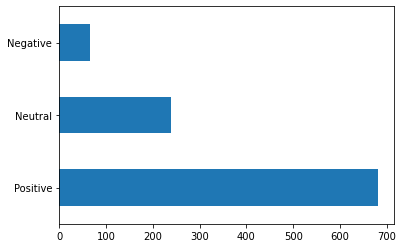

In [331]:
df_en['Sentiment'].value_counts().plot(kind='barh')

In [332]:
df_en.to_csv('merged_file.csv', index=False)